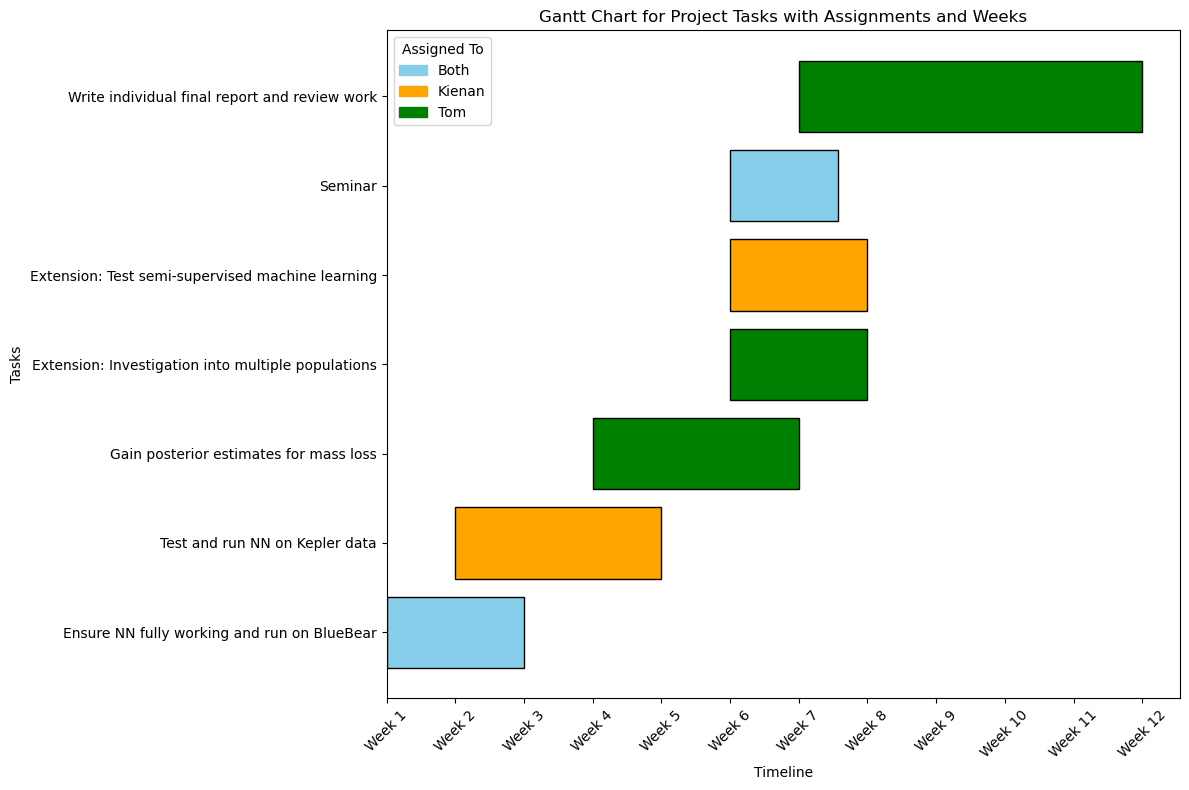

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import date2num
from datetime import datetime, timedelta

# Define task data with assigned responsibilities and colors
tasks = [
    {"Task": "Ensure NN fully working and run on BlueBear", "Start": "2025-01-20", "End": "2025-02-03", "Assigned": "Both", "Color": "skyblue"},
    {"Task": "Test and run NN on Kepler data", "Start": "2025-01-27", "End": "2025-02-17", "Assigned": "Kienan", "Color": "orange"},
    {"Task": "Gain posterior estimates for mass loss", "Start": "2025-02-10", "End": "2025-03-03", "Assigned": "Tom", "Color": "green"},
    {"Task": "Extension: Investigation into multiple populations", "Start": "2025-02-24", "End": "2025-03-10", "Assigned": "Tom", "Color": "green"},
    {"Task": "Extension: Test semi-supervised machine learning", "Start": "2025-02-24", "End": "2025-03-10", "Assigned": "Kienan", "Color": "orange"},
    {"Task": "Seminar", "Start": "2025-02-24", "End": "2025-03-07", "Assigned": "Both", "Color": "skyblue"},
    {"Task": "Write individual final report and review work", "Start": "2025-03-03", "End": "2025-04-07", "Assigned": "Tom", "Color": "green"}
]

# Convert task data into a DataFrame
df = pd.DataFrame(tasks)

# Convert start and end dates to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate project start and end
project_start = df['Start'].min()
project_end = df['End'].max()

# Generate week labels
weeks = pd.date_range(start=project_start, end=project_end, freq='W-MON').to_pydatetime().tolist()
week_labels = [f"Week {i+1}" for i in range(len(weeks))]

# Create Gantt chart
fig, ax = plt.subplots(figsize=(12, 8))

# Add bars for each task with assigned colors
for i, task in df.iterrows():
    ax.barh(task["Task"], (task["End"] - task["Start"]).days, 
            left=(task["Start"] - project_start).days, 
            color=task["Color"], edgecolor='black')

# Customize the x-axis
ax.set_xticks([(week - project_start).days for week in weeks])
ax.set_xticklabels(week_labels, rotation=45)

# Add legend
legend_labels = {"skyblue": "Both", "orange": "Kienan", "green": "Tom"}
handles = [plt.matplotlib.patches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=handles, title="Assigned To")

# Add labels and title
plt.xlabel("Timeline")
plt.ylabel("Tasks")
plt.title("Gantt Chart for Project Tasks with Assignments and Weeks")
plt.tight_layout()
plt.savefig("Gantt_chart.png")
plt.show()